In [2]:
#Import Drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Setting the current working directory
import os; os.chdir('/content/drive/MyDrive/AIML/Projects/NN&DL')

In [4]:
%tensorflow_version 2.x

In [30]:
#Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation



#Import h5py library to read data file stored in Google Drive.
import h5py

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from sklearn.neighbors import KNeighborsClassifier

from random import shuffle

import math



**Read the data from the h5py file and understand the train/test splits**

In [6]:
#Read data from the h5py file.
h5f = h5py.File('/content/drive/My Drive/AIML/Projects/NN&DL/SVHN_single_grey1.h5', 'r')


In [7]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
#understand the train/test splits

In [8]:
#Loading Train, Validation and test set
X_train = h5f ['X_train'][:]
y_train = h5f['y_train'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
X_test = h5f ['X_test'][:]
y_test = h5f['y_test'][:]

In [9]:
#Close file
h5f.close()

In [10]:
print('Unique labels in y_train:', np.unique(y_train))
print('Unique labels in y_val:', np.unique(y_val))
print('Unique labels in y_test:', np.unique(y_test))

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


In [11]:

#Check shapes of data sets.
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

print('\n')
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

print('\n')
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_val', X_val.shape[0])
print('Number of images in X_test', X_test.shape[0])


X_train shape: (42000, 32, 32)
X_val shape: (60000, 32, 32)
X_test shape: (18000, 32, 32)


y_train shape: (42000,)
y_val shape: (60000,)
y_test shape: (18000,)


Number of images in X_train 42000
Number of images in X_val 60000
Number of images in X_test 18000


In 60000 records of data,Each data/image is a 32x32 size data in RGB format.
42000 records in training set and 18000 records in validation set.

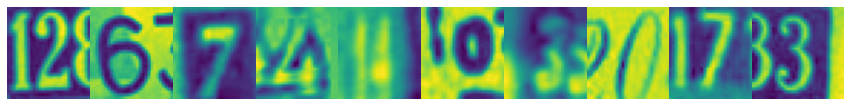

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [12]:
# Visualizing first 10 images in the dataset and their labels
plt.figure(figsize = (15, 4.5))
for i in range(10):  
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape((32, 32)))
    plt.axis('off')
plt.subplots_adjust(wspace = -0.1, hspace = -0.1)
plt.show()

print('Label for each of the above image: %s' % (y_train[0 : 10]))

Checking first image and label in training set
--------------------------------------------------------------------------------


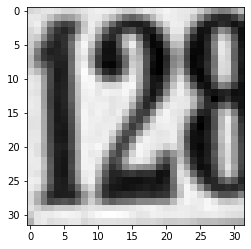

Label: 2


In [13]:
#Checking images are viewed up for both training ,validation and test sets.

print('Checking first image and label in training set'); print('--'*40)
plt.imshow(X_train[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_train[0])



Checking first image and label in validation set
--------------------------------------------------------------------------------


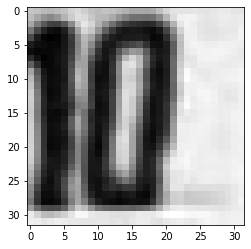

Label: 0


In [14]:
print('Checking first image and label in validation set'); print('--'*40)
plt.imshow(X_val[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_val[0])

Checking first image and label in test set
--------------------------------------------------------------------------------


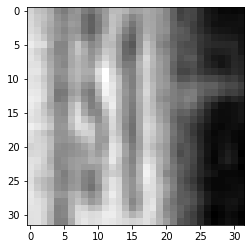

Label: 1


In [15]:
print('Checking first image and label in test set'); print('--'*40)
plt.imshow(X_test[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_test[0])

***Reshape and normalize the train and test features***

In [16]:
print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Ensure the values are float so that we would get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Ensure the values are float so that we would get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------


**One hot encode the labels for train and test data**

In [17]:
#Converting output labels to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10)

In [18]:
print('First 3 examples in training dataset now are: \n', y_train[0:3])
print('\nFirst 3 examples in validation dataset now are: \n', y_val[0:3])
print('\nFirst 3 examples in test dataset now are: \n', y_test[0:3])

First 3 examples in training dataset now are: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

First 3 examples in validation dataset now are: 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

First 3 examples in test dataset now are: 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:

print('The shape of the training dataset:', X_train.shape)
print('The shape of the training (y) dataset:', y_train.shape)
print('The shape of the validation dataset:', X_val.shape)
print('The shape of the validation (y) dataset:', y_val.shape)
print('The shape of the test dataset:', X_test.shape)
print('The shape of the test (y) dataset:', y_test.shape)

The shape of the training dataset: (42000, 1024)
The shape of the training (y) dataset: (42000, 10)
The shape of the validation dataset: (60000, 1024)
The shape of the validation (y) dataset: (60000, 10)
The shape of the test dataset: (18000, 1024)
The shape of the test (y) dataset: (18000, 10)


**Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax**

In [20]:
##Initialize the Deep Neural Network Classifier
keras_model = Sequential()

In [21]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer of 256 nodes
keras_model.add(Dense(256, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer of 128 nodes
keras_model.add(Dense(128, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer of 64 nodes
keras_model.add(Dense(64, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer of 32 nodes
keras_model.add(Dense(32, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [22]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

**Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation**



**Fit and evaluate the model. Print the loss and accuracy for the test data**

In [23]:
# compiling the Neural Network classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
# Fitting the model to the Training data
history_1 = keras_model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 [==============================] - 7s 30ms/step - loss: 2.3353 - accuracy: 0.1006 - val_loss: 2.3044 - val_accuracy: 0.1011
Epoch 2/20
210/210 [==============================] - 6s 28ms/step - loss: 2.3028 - accuracy: 0.1038 - val_loss: 2.2959 - val_accuracy: 0.1146
Epoch 3/20
210/210 [==============================] - 6s 28ms/step - loss: 2.2031 - accuracy: 0.1704 - val_loss: 1.6335 - val_accuracy: 0.4234
Epoch 4/20
210/210 [==============================] - 6s 28ms/step - loss: 1.6044 - accuracy: 0.4415 - val_loss: 1.3949 - val_accuracy: 0.5313
Epoch 5/20
210/210 [==============================] - 6s 28ms/step - loss: 1.3458 - accuracy: 0.5494 - val_loss: 1.2313 - val_accuracy: 0.6011
Epoch 6/20
210/210 [==============================] - 6s 28ms/step - loss: 1.1717 - accuracy: 0.6207 - val_loss: 1.0325 - val_accuracy: 0.6765
Epoch 7/20
210/210 [==============================] - 6s 28ms/step - loss: 1.0458 - accuracy: 0.6743 - val_loss: 1.0266 - val_accuracy: 0.6774

In [25]:
#Evaluating the Model
results = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using basic Neural Network (ADAM) : ', results[1])

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6233 - accuracy: 0.8029
Validation accuracy using basic Neural Network (ADAM) :  0.8029000163078308


Validation accuracy using basic Neural Network (ADAM) =80.29%

In [58]:
#Testing NN model to test data
history_t = keras_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
210/210 [==============================] - 5s 21ms/step - loss: 0.1327 - accuracy: 0.9583 - val_loss: 1.5171 - val_accuracy: 0.8179
Epoch 2/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0647 - accuracy: 0.9786 - val_loss: 1.4658 - val_accuracy: 0.8177
Epoch 3/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0558 - accuracy: 0.9810 - val_loss: 1.4694 - val_accuracy: 0.8254
Epoch 4/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0657 - accuracy: 0.9779 - val_loss: 1.5133 - val_accuracy: 0.8166
Epoch 5/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0723 - accuracy: 0.9762 - val_loss: 1.6327 - val_accuracy: 0.8107
Epoch 6/50
210/210 [==============================] - 4s 21ms/step - loss: 0.1289 - accuracy: 0.9590 - val_loss: 1.4938 - val_accuracy: 0.8130
Epoch 7/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0847 - accuracy: 0.9720 - val_loss: 1.4679 - val_accuracy: 0.8198

In [59]:
#Print the loss and accuracy for the test data
test = keras_model.evaluate(X_test, y_test)
print('Loss and accuracy using basic Neural Network (ADAM) : ', test[1])

563/563 [==============================] - 2s 4ms/step - loss: 1.5949 - accuracy: 0.8193
Loss and accuracy using basic Neural Network (ADAM) :  0.8193333148956299


Loss and accuracy using basic Neural Network (ADAM) for the test data is 81.93%

changing the learning rate in ADAM optimizer.
Taking learning rate small, means model will learn slowly. So,taking more number of epochs.

In [40]:
from keras import optimizers
from keras.optimizers import Adam

In [41]:

#Setting the learning rate and decay in adam
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_3 = keras_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 6s 29ms/step - loss: 0.1615 - accuracy: 0.9468 - val_loss: 0.4245 - val_accuracy: 0.9160
Epoch 2/100
210/210 [==============================] - 6s 28ms/step - loss: 0.1373 - accuracy: 0.9547 - val_loss: 0.4280 - val_accuracy: 0.9170
Epoch 3/100
210/210 [==============================] - 6s 28ms/step - loss: 0.1440 - accuracy: 0.9500 - val_loss: 0.4375 - val_accuracy: 0.9125
Epoch 4/100
210/210 [==============================] - 6s 28ms/step - loss: 0.1171 - accuracy: 0.9606 - val_loss: 0.4679 - val_accuracy: 0.9035
Epoch 5/100
210/210 [==============================] - 6s 28ms/step - loss: 0.1078 - accuracy: 0.9631 - val_loss: 0.4656 - val_accuracy: 0.9107
Epoch 6/100
210/210 [==============================] - 6s 29ms/step - loss: 0.1508 - accuracy: 0.9495 - val_loss: 0.4054 - val_accuracy: 0.9264
Epoch 7/100
210/210 [==============================] - 6s 29ms/step - loss: 0.1021 - accuracy: 0.9651 - val_loss: 0.4007 - val_accuracy:

In [43]:
results_adam = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using learning rate = 0.0001 (ADAM) : ', results_adam[1])

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5507 - accuracy: 0.9200
Validation accuracy using learning rate = 0.0001 (ADAM) :  0.9199666380882263


The accuracy of the model on validation data using ADAM with learning rate = 0.0001 has shown significant improvement from 80.29% to 91.99%

In [60]:
#Testing model on test data
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_t1 = keras_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
210/210 [==============================] - 5s 22ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 1.6323 - val_accuracy: 0.8239
Epoch 2/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0596 - accuracy: 0.9802 - val_loss: 1.7162 - val_accuracy: 0.8108
Epoch 3/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0955 - accuracy: 0.9700 - val_loss: 1.5805 - val_accuracy: 0.8240
Epoch 4/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 1.6561 - val_accuracy: 0.8196
Epoch 5/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 1.6165 - val_accuracy: 0.8083
Epoch 6/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0617 - accuracy: 0.9793 - val_loss: 1.6479 - val_accuracy: 0.8189
Epoch 7/50
210/210 [==============================] - 4s 21ms/step - loss: 0.0966 - accuracy: 0.9700 - val_loss: 1.5737 - val_accuracy: 0.8196

In [61]:
test1 = keras_model.evaluate(X_test, y_test)
print('Loss and accuracy using learning rate = 0.0001 (ADAM) : ', test1[1])

563/563 [==============================] - 2s 3ms/step - loss: 1.6113 - accuracy: 0.8196
Loss and accuracy using learning rate = 0.0001 (ADAM) :  0.819611132144928


Loss and accuracy using learning rate 0.0001 (ADAM) for the test data = 81.96%

**Implementing (vectorized) Backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)**

In [44]:
#Initialize Artificial Neural Network Classifier
keras_model_2 = Sequential()

In [45]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer of 256 nodes
keras_model_2.add(Dense(256, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer of 128 nodes
keras_model_2.add(Dense(128, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer of 64 nodes
keras_model_2.add(Dense(64, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer of 32 nodes
keras_model_2.add(Dense(32, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [46]:
keras_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [47]:
#Setting the learning rate in Adam
adam = optimizers.Adam(lr = 0.001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
# Fitting the NN to the Training data
history_adam_bp = keras_model_2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 7s 29ms/step - loss: 2.3283 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
210/210 [==============================] - 6s 29ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
210/210 [==============================] - 6s 29ms/step - loss: 2.3025 - accuracy: 0.1012 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
210/210 [==============================] - 6s 29ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
210/210 [==============================] - 6s 28ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
210/210 [==============================] - 6s 28ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
210/210 [==============================] - 6s 28ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3026 - val_accuracy:

In [49]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Validation accuracy using ADAM : ', results_2[1])

1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Validation accuracy using ADAM :  0.10000000149011612


Validation accuracy using ADAM in Backpropagation method shows 100%

In [63]:
# Testing data on test data
#Setting the learning rate in Adam
adam = optimizers.Adam(lr = 0.001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_t2 = keras_model_2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
210/210 [==============================] - 5s 22ms/step - loss: 2.3026 - accuracy: 0.1023 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 2/50
210/210 [==============================] - 4s 21ms/step - loss: 2.3026 - accuracy: 0.1026 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 3/50
210/210 [==============================] - 4s 21ms/step - loss: 2.3026 - accuracy: 0.1024 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 4/50
210/210 [==============================] - 4s 21ms/step - loss: 2.3026 - accuracy: 0.1027 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 5/50
210/210 [==============================] - 4s 21ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 6/50
210/210 [==============================] - 4s 21ms/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 7/50
210/210 [==============================] - 4s 21ms/step - loss: 2.3026 - accuracy: 0.1031 - val_loss: 2.3027 - val_accuracy: 0.0955

In [68]:
#Print the loss and accuracy for the test data
test2 = keras_model_2.evaluate(X_test, y_test)
print(' Loss and accuracy for the test data using ADAM in Backpropagation method: ', test2[1])

563/563 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.0955
 Loss and accuracy for the test data using ADAM in Backpropagation method:  0.09549999982118607


 Loss and accuracy for the test data using ADAM in Backpropagation method is 95.49%

***Implementing batch normalization for training the neural network***

In [50]:
#Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

In [51]:
#Adding Batch normalization layer
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer of 256 nodes
keras_model_3.add(Dense(256, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer of 128 nodes
keras_model_3.add(Dense(128, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer of 64 nodes
keras_model_3.add(Dense(64, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer of 32 nodes
keras_model_3.add(Dense(32, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [52]:
keras_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

In [55]:
#Using ADAM optimizer with learning rate= 0.0001 
#Setting the learning rate and decay in adam
adam = optimizers.Adam(lr = 0.0001)
# compiling the NN classifier
keras_model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [56]:
# Fitting the NN to the Training data
history_4 = keras_model_3.fit(X_train, y_train, validation_data = (X_val,y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 8s 33ms/step - loss: 1.8617 - accuracy: 0.3700 - val_loss: 1.7908 - val_accuracy: 0.3931
Epoch 2/100
210/210 [==============================] - 7s 32ms/step - loss: 0.9527 - accuracy: 0.7051 - val_loss: 1.5389 - val_accuracy: 0.4908
Epoch 3/100
210/210 [==============================] - 7s 32ms/step - loss: 0.7766 - accuracy: 0.7539 - val_loss: 1.4291 - val_accuracy: 0.5158
Epoch 4/100
210/210 [==============================] - 7s 32ms/step - loss: 0.6769 - accuracy: 0.7862 - val_loss: 1.4358 - val_accuracy: 0.5212
Epoch 5/100
210/210 [==============================] - 7s 32ms/step - loss: 0.5991 - accuracy: 0.8102 - val_loss: 1.1213 - val_accuracy: 0.6315
Epoch 6/100
210/210 [==============================] - 7s 32ms/step - loss: 0.5366 - accuracy: 0.8294 - val_loss: 1.3870 - val_accuracy: 0.5421
Epoch 7/100
210/210 [==============================] - 7s 32ms/step - loss: 0.5080 - accuracy: 0.8404 - val_loss: 1.0792 - val_accuracy:

In [57]:
#Evaluating the Model
results_1 = keras_model_3.evaluate(X_val, y_val)
print('Validation accuracy using BatchNormalization NN ADAM : ', results_1[1])

1875/1875 [==============================] - 7s 4ms/step - loss: 0.6784 - accuracy: 0.8582
Validation accuracy using BatchNormalization NN ADAM :  0.8581500053405762


Validation accuracy using BatchNormalization in NN ADAM = 85.81%

In [66]:
#Testing Model on test data
history_t3 = keras_model_3.fit(X_train, y_train, validation_data = (X_test,y_test), batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
210/210 [==============================] - 5s 24ms/step - loss: 0.0446 - accuracy: 0.9846 - val_loss: 1.1480 - val_accuracy: 0.7929
Epoch 2/50
210/210 [==============================] - 5s 24ms/step - loss: 0.0384 - accuracy: 0.9862 - val_loss: 1.2412 - val_accuracy: 0.7894
Epoch 3/50
210/210 [==============================] - 5s 24ms/step - loss: 0.0393 - accuracy: 0.9870 - val_loss: 1.3725 - val_accuracy: 0.7631
Epoch 4/50
210/210 [==============================] - 5s 24ms/step - loss: 0.0485 - accuracy: 0.9838 - val_loss: 1.2033 - val_accuracy: 0.7859
Epoch 5/50
210/210 [==============================] - 5s 24ms/step - loss: 0.0503 - accuracy: 0.9829 - val_loss: 1.2869 - val_accuracy: 0.7822
Epoch 6/50
210/210 [==============================] - 5s 24ms/step - loss: 0.0393 - accuracy: 0.9871 - val_loss: 1.3573 - val_accuracy: 0.7641
Epoch 7/50
210/210 [==============================] - 5s 25ms/step - loss: 0.0412 - accuracy: 0.9863 - val_loss: 1.3414 - val_accuracy: 0.7657

In [69]:
#Print the loss and accuracy for the test data
test3 = keras_model_3.evaluate(X_test, y_test)
print(' loss and accuracy for the test data using BatchNormalization NN ADAM : ', test3[1])

563/563 [==============================] - 2s 4ms/step - loss: 1.3343 - accuracy: 0.8032
 loss and accuracy for the test data using BatchNormalization NN ADAM :  0.8032222390174866


loss and accuracy for the test data using BatchNormalization NN ADAM is 80.32%

**Predicting the digits using Neural Network classifier on test data**

**Image 1**

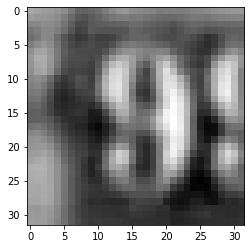

In [71]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32), cmap = 'gray')

In [72]:
#Predicting the digits
print('Label: ', keras_model_3.predict_classes(X_test)[5])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Label:  9


**Image 2**

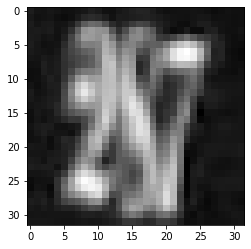

In [73]:
#Showing the image
plt.imshow(X_test[7].reshape(32,32), cmap = 'gray')

In [74]:
#Predicting the digits
print('Label: ', keras_model_3.predict_classes(X_test)[7])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Label:  9


**Image 3**

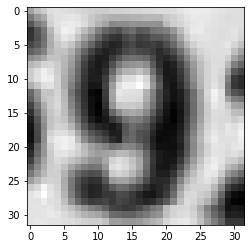

In [75]:
#Showing the image
plt.imshow(X_test[70].reshape(32,32), cmap = 'gray')

In [76]:
#Predicting the digits
print('Label: ', keras_model_3.predict_classes(X_test)[70])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Label:  9


In [77]:
#Predicting for all images
y_pred = keras_model_3.predict_classes(X_test)
print(y_pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 7 2 ... 7 8 2]


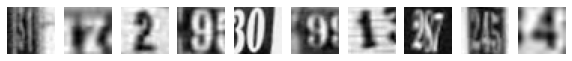

Labels for each of the above image: [0 7 2 9 0 9 1 9 1 4]


In [78]:
#visualising the first 10 images of the test data and printing their labels
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[i].reshape(32,32), cmap = 'gray')
    plt.axis('off')
plt.show()
print('Labels for each of the above image: %s' %(y_pred[0:10]))